In [11]:
import scipy.io
import torch
import random
import pandas as pd
from src.score_funcs import *
# from Sarcos.kernel import *
from Sarcos.VI_Full_Bayesian_GP_GammaPrior.fb_sarcos_tasks import *
from Sarcos.MCV_sarcos import *
from Sarcos.NCV_sarcos import *

In [13]:
X = torch.load('../X.pt')
y = torch.load('../y.pt')
Xstar = torch.load('../Xstar.pt')
Ystar = torch.load('../ystar.pt')
X = X.float()
y = y.float()
Xstar = Xstar.float()
Ystar = Ystar.float()

In [14]:
# Get the posterior parameters under Gamma Prior
post_mean_etaparms = torch.tensor([-0.1824,  0.1950])
post_cov_etaparms = torch.tensor([[ 0.0029, -0.0025], [-0.0025,  0.0065]])


In [14]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=1
mCV2_in1 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0.,
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,
                   tasks_per_meta_batch=1,
                   **score_dict)
mCV2_in1.main_loop(num_iterations=1000)



mCV2_in1.test(mtr_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.0020518712233752014
20/1000. loss: 0.001701338996645063
30/1000. loss: 0.0012779115932062268
40/1000. loss: 0.0008696216158568859
50/1000. loss: 0.0007680863956920803
60/1000. loss: 0.0005321287433616817
70/1000. loss: 0.00047876714379526677
80/1000. loss: 0.00034998517658095806
90/1000. loss: 0.00026253343748976475
100/1000. loss: 0.00023653054086025804
110/1000. loss: 0.0001538427936793596
120/1000. loss: 0.00016707850008970126
130/1000. loss: 0.00013435695291263983
140/1000. loss: 0.00013839390521752648
150/1000. loss: 0.0001088027493096888
160/1000. loss: 7.822435513844539e-05
170/1000. loss: 6.382924002537038e-05
180/1000. loss: 9.445186224183999e-05
190/1000. loss: 8.596964726166334e-05
200/1000. loss: 9.247674097423442e-05
210/1000. loss: 7.766013368382119e-05
220/1000. loss: 8.188993560906966e-05
230/1000. loss: 9.316416653746274e-05
240/1000. loss: 8.425987962255022e-05
250/1000. loss: 5.7819807079795285e-05
260/1000. loss: 5.669605307048187e-05
270/1000. loss

In [15]:
print(np.mean(np.array(mCV2_in1.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in1.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in1.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in1.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in1.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in1.log_test[0]['Abserr_MCests'])))


0.14963008 0.15921388107538223 0.15914984
0.0066607413 0.004225621552980736 0.0058679935


In [16]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=5
mCV2_in5 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0.,
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,
                   tasks_per_meta_batch=1,
                   **score_dict)
mCV2_in5.main_loop(num_iterations=1000)



mCV2_in5.test(mtr_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.0005032656103139743
20/1000. loss: 0.00028251050534890967
30/1000. loss: 0.0001549854569020681
40/1000. loss: 8.418010911555029e-05
50/1000. loss: 5.481224416143959e-05
60/1000. loss: 3.6149325977644084e-05
70/1000. loss: 2.5206010585065995e-05
80/1000. loss: 3.923303511328413e-05
90/1000. loss: 4.850921332035796e-05
100/1000. loss: 4.154208972977358e-05
110/1000. loss: 6.826396547694457e-05
120/1000. loss: 1.9342251880516416e-05
130/1000. loss: 0.00010013537439590436
140/1000. loss: 5.898500214698288e-05
150/1000. loss: 3.269025526151381e-05
160/1000. loss: 1.4932940121070715e-05
170/1000. loss: 5.8865281698672336e-05
180/1000. loss: 3.816604527173695e-05
190/1000. loss: 5.372634914238006e-05
200/1000. loss: 3.312455633022182e-05
210/1000. loss: 6.0773901805077915e-05
220/1000. loss: 4.9284348779110584e-05
230/1000. loss: 4.920279578755071e-05
240/1000. loss: 2.6335790107623324e-05
250/1000. loss: 3.774471792894474e-05
260/1000. loss: 0.0001632723005968728
270/1000. l

In [17]:
print(np.mean(np.array(mCV2_in5.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in5.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in5.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in5.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in5.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in5.log_test[0]['Abserr_MCests'])))

0.112805426 0.15924684175103904 0.15936519
0.006522841 0.004287640591501671 0.006142249


In [18]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=10
mCV2_in10 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0.,
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,
                   tasks_per_meta_batch=1,
                   **score_dict)
mCV2_in10.main_loop(num_iterations=1000)



mCV2_in10.test(mtr_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)


10/1000. loss: 7.197449553473235e-05
20/1000. loss: 2.683056135310835e-05
30/1000. loss: 3.151785946329255e-05
40/1000. loss: 2.3369038171949796e-05
50/1000. loss: 4.605384565365966e-05
60/1000. loss: 2.6493221702139637e-05
70/1000. loss: 3.5470218426780777e-05
80/1000. loss: 3.6621675917558605e-05
90/1000. loss: 2.3809897720639127e-05
100/1000. loss: 3.0649736390842006e-05
110/1000. loss: 9.58772599005897e-05
120/1000. loss: 3.511398499540519e-05
130/1000. loss: 4.3771951095550324e-05
140/1000. loss: 2.3399234896714917e-05
150/1000. loss: 2.769277782590507e-05
160/1000. loss: 6.12975627348078e-05
170/1000. loss: 2.788305303056404e-05
180/1000. loss: 2.904757875512587e-05
190/1000. loss: 2.5942208652907083e-05
200/1000. loss: 2.9669162086065625e-05
210/1000. loss: 2.4135896842381045e-05
220/1000. loss: 1.2226018344563273e-05
230/1000. loss: 2.8239420726094976e-05
240/1000. loss: 2.6453540510829043e-05
250/1000. loss: 2.5993154804382356e-05
260/1000. loss: 6.401386003744847e-05
270/1000

In [19]:
print(np.mean(np.array(mCV2_in10.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in10.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in10.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in10.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in10.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in10.log_test[0]['Abserr_MCests'])))

0.06869365 0.1593410546258092 0.15943602
0.0061819754 0.004170831601935448 0.0059551354


In [20]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=20
mCV2_in20 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0.,
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,
                   tasks_per_meta_batch=1,
                   **score_dict)
mCV2_in20.main_loop(num_iterations=1000)


mCV2_in20.test(mtr_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.00021600392112759438
20/1000. loss: 0.00022016765578882768
30/1000. loss: 8.052646117846507e-05
40/1000. loss: 0.0001439041610865388
50/1000. loss: 8.053839851527301e-05
60/1000. loss: 7.983784205123357e-05
70/1000. loss: 8.839085521685774e-05
80/1000. loss: 0.00013565411998115451
90/1000. loss: 0.00010909749062193441
100/1000. loss: 9.173243308282508e-05
110/1000. loss: 0.00012416953012461818
120/1000. loss: 7.919267382021644e-05
130/1000. loss: 8.957794429989007e-05
140/1000. loss: 5.06710008266964e-05
150/1000. loss: 5.945392349531176e-05
160/1000. loss: 0.00013127429565429338
170/1000. loss: 8.779645224876731e-05
180/1000. loss: 0.00011086299608678018
190/1000. loss: 7.50897689613339e-05
200/1000. loss: 0.000101611627303555
210/1000. loss: 3.3048858404072236e-05
220/1000. loss: 0.00010181268088444994
230/1000. loss: 7.601632762543886e-05
240/1000. loss: 4.1123876087567623e-05
250/1000. loss: 8.814305928126487e-05
260/1000. loss: 5.777612441306701e-05
270/1000. loss

In [21]:
print(np.mean(np.array(mCV2_in20.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in20.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in20.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in20.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in20.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in20.log_test[0]['Abserr_MCests'])))

0.11574514 0.15925830262154342 0.15918201
0.010125166 0.004439622159192437 0.0061717294


In [22]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=50
mCV2_in50 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0.,
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,
                   tasks_per_meta_batch=1,
                   **score_dict)
mCV2_in50.main_loop(num_iterations=1000)



mCV2_in50.test(mtr_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 1.508548403705845e-05
20/1000. loss: 3.673968797102134e-05
30/1000. loss: 2.3256734698406946e-05
40/1000. loss: 0.00010396742693501438
50/1000. loss: 3.6521958531920975e-05
60/1000. loss: 1.6104533870020532e-05
70/1000. loss: 6.458713684196483e-05
80/1000. loss: 4.182936822871852e-05
90/1000. loss: 6.151683032840083e-05
100/1000. loss: 7.49634854400938e-05
110/1000. loss: 4.473881754165632e-05
120/1000. loss: 5.012783612983185e-05
130/1000. loss: 8.951981094469374e-05
140/1000. loss: 2.6863271634169907e-05
150/1000. loss: 4.136457474857025e-05
160/1000. loss: 1.516820442226674e-05
170/1000. loss: 3.511626402996626e-05
180/1000. loss: 2.0250420652700997e-05
190/1000. loss: 1.898873473464846e-05
200/1000. loss: 5.101566630401066e-05
210/1000. loss: 4.300204413993924e-05
220/1000. loss: 1.9583330882255723e-05
230/1000. loss: 4.85118673850593e-05
240/1000. loss: 2.982305725254264e-05
250/1000. loss: 6.266892280564207e-05
260/1000. loss: 2.115721385962388e-05
270/1000. loss: 

In [23]:
print(np.mean(np.array(mCV2_in50.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in50.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in50.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in50.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in50.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in50.log_test[0]['Abserr_MCests'])))

0.057818986 0.15919543581455947 0.15910776
0.006931895 0.004198705533050758 0.0057808836


In [24]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=100
mCV2_in100 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0.,
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,
                   tasks_per_meta_batch=1,
                   **score_dict)
mCV2_in100.main_loop(num_iterations=1000)


mCV2_in100.test(mtr_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 5.099587208405865e-05
20/1000. loss: 5.1085196537314916e-05
30/1000. loss: 3.5564275663091394e-05
40/1000. loss: 6.810249417412705e-05
50/1000. loss: 3.5906563240928335e-05
60/1000. loss: 7.933106071504881e-05
70/1000. loss: 3.0398326384784013e-05
80/1000. loss: 2.6149802905095498e-05
90/1000. loss: 5.998554375992171e-05
100/1000. loss: 6.423703856057727e-05
110/1000. loss: 2.935752581123552e-05
120/1000. loss: 2.003099316709722e-05
130/1000. loss: 5.2750069289686505e-05
140/1000. loss: 1.654710412140048e-05
150/1000. loss: 3.2527146061056555e-05
160/1000. loss: 7.167803526044735e-05
170/1000. loss: 4.518329274105781e-05
180/1000. loss: 3.628598210525524e-05
190/1000. loss: 3.0449386167674673e-05
200/1000. loss: 3.817340879095354e-05
210/1000. loss: 6.852937032988393e-05
220/1000. loss: 6.400520175589008e-05
230/1000. loss: 2.5218060952170162e-05
240/1000. loss: 5.084569434075092e-05
250/1000. loss: 3.687749028813414e-05
260/1000. loss: 3.594003942453128e-05
270/1000. lo

In [25]:
print(np.mean(np.array(mCV2_in100.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in100.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in100.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in100.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in100.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in100.log_test[0]['Abserr_MCests'])))

0.073499724 0.15925686641037465 0.15924084
0.00834119 0.004176623262772642 0.005769536


In [26]:
# # NCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}

out2 = torch.zeros(1000,2)
for i in range(1000):
    if i%10 ==0:
        print('{}/{}'.format(i+1,1000))
    nCV = NeuralCV_Sarcos('sarcos', NeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,
                   drop_prob=0., \
                   tasks=mtr_tasks, optim=torch.optim.Adam, lr=1e-3, K=K,
                   **score_dict)
    __ = nCV.train_val(num_epochs=20, batch_size=5, verbose=False)
    out2[i,0] = torch.tensor(__[0])
    out2[i,1] = torch.tensor(__[1])




1/1000
11/1000
21/1000
31/1000
41/1000
51/1000
61/1000
71/1000
81/1000
91/1000
101/1000
111/1000
121/1000
131/1000
141/1000
151/1000
161/1000
171/1000
181/1000
191/1000
201/1000
211/1000
221/1000
231/1000
241/1000
251/1000
261/1000
271/1000
281/1000
291/1000
301/1000
311/1000
321/1000
331/1000
341/1000
351/1000
361/1000
371/1000
381/1000
391/1000
401/1000
411/1000
421/1000
431/1000
441/1000
451/1000
461/1000
471/1000
481/1000
491/1000
501/1000
511/1000
521/1000
531/1000
541/1000
551/1000
561/1000
571/1000
581/1000
591/1000
601/1000
611/1000
621/1000
631/1000
641/1000
651/1000
661/1000
671/1000
681/1000
691/1000
701/1000
711/1000
721/1000
731/1000
741/1000
751/1000
761/1000
771/1000
781/1000
791/1000
801/1000
811/1000
821/1000
831/1000
841/1000
851/1000
861/1000
871/1000
881/1000
891/1000
901/1000
911/1000
921/1000
931/1000
941/1000
951/1000
961/1000
971/1000
981/1000
991/1000


In [27]:
print(out2.mean(0)) #mc, ncv
print(out2.std(0)) #mc, ncv

tensor([0.1592, 0.1593])
tensor([0.0041, 0.0058])


In [28]:
import pandas as pd
no_tasks = 1000
set_of_insteps = [1,5,10, 20, 50,100]
no_insteps = len(set_of_insteps)

In [29]:
nCV_log = out2
for i in range(no_insteps):

    if set_of_insteps[i] == 1:
        mCV_log = mCV2_in1



    elif set_of_insteps[i] == 5:
        mCV_log = mCV2_in5

    elif set_of_insteps[i] == 10:
        mCV_log = mCV2_in10

    elif set_of_insteps[i] == 20:
        mCV_log = mCV2_in20



    elif set_of_insteps[i] == 50:
        mCV_log = mCV2_in50

    elif set_of_insteps[i] == 100:
        mCV_log = mCV2_in100


    cur_MCV_data = list(zip(np.array(mCV_log.log_test[0]['Abserr_CVests']), np.repeat('MCV-{}'.format(set_of_insteps[i]), no_tasks), np.repeat("N={}".format(set_of_insteps[i]), no_tasks)))
    cur_MCV_data_df = pd.DataFrame(data=cur_MCV_data, columns=['est_abserr', 'method', 'num_inner_steps'])
    if i == 0:
        MCV_data_df = cur_MCV_data_df
    if i >= 1:
        MCV_data_df = MCV_data_df.append(cur_MCV_data_df)


    # NCV
    cur_NCV_data = list(zip(nCV_log[:,1].numpy(), np.repeat('NCV', no_tasks), np.repeat("N={}".format(set_of_insteps[i]), no_tasks)))
    cur_NCV_data_df = pd.DataFrame(data= cur_NCV_data, columns=['est_abserr', 'method', 'num_inner_steps'])
    if i == 0:
        NCV_data_df = cur_NCV_data_df
    # if i >= 1:
        # NCV_data_df= NCV_data_df.append(cur_NCV_data_df)

    # MC
    cur_MC_data =  list(zip(nCV_log[:,0].numpy(), np.repeat('MC', no_tasks), np.repeat("N={}".format(set_of_insteps[i]), no_tasks)))
    cur_MC_data_df = pd.DataFrame(data=cur_MC_data,columns=['est_abserr', 'method', 'num_inner_steps'])
    if i == 0:
        MC_data_df = cur_MC_data_df
    # if i >= 1:
    #     MC_data_df= MC_data_df.append(cur_MC_data_df)



/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_4587/2023462612.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCV_data_df = MCV_data_df.append(cur_MCV_data_df)
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_4587/2023462612.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCV_data_df = MCV_data_df.append(cur_MCV_data_df)
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_4587/2023462612.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCV_data_df = MCV_data_df.append(cur_MCV_data_df)
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_4587/2023462612.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

In [30]:
# Merge into one giant dataset
fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE =  MC_data_df.append([NCV_data_df, MCV_data_df])

/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_4587/2921923520.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE =  MC_data_df.append([NCV_data_df, MCV_data_df])


In [31]:
fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE

,est_abserr,method,num_inner_steps
0,0.161887,MC,N=1
1,0.162565,MC,N=1
2,0.158134,MC,N=1
3,0.160129,MC,N=1
4,0.158278,MC,N=1
...,...,...,...
995,0.046144,MCV-100,N=100
996,0.062948,MCV-100,N=100
997,0.073333,MCV-100,N=100
998,0.075997,MCV-100,N=100


In [32]:
# Save data
fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE.to_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE.pkl")

In [30]:
# Plot

In [16]:
fb_Sarcos_exp_DF_gammaprior_invest_insteps = pd.read_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE.pkl")

In [17]:
# results_CF_sarcos_ss2 = torch.load('../../CF/results_CF_sarcos_ss2.pt')
results_CF_sarcos_ss2 = torch.load('../../CF/results_nonsimCF_sarcos_ss2.pt')

In [18]:
# CF
cur_CF_data = list(zip(results_CF_sarcos_ss2[:,1].squeeze().numpy(), np.repeat('CF', 1000), np.repeat("N={}".format(1), 1000)))
CF_data_df = pd.DataFrame(data= cur_CF_data, columns=['est_abserr', 'method', 'num_inner_steps'])


In [19]:
fb_Sarcos_exp_DF_gammaprior_invest_insteps = fb_Sarcos_exp_DF_gammaprior_invest_insteps.append(CF_data_df)

/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_28000/2906933634.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb_Sarcos_exp_DF_gammaprior_invest_insteps = fb_Sarcos_exp_DF_gammaprior_invest_insteps.append(CF_data_df)


In [20]:
df_sort = fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MC']
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'CF'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'NCV'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-1'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-5'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-20'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-50'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-100'])

/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_28000/1308900517.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'CF'])
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_28000/1308900517.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'NCV'])
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_28000/1308900517.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_D

In [22]:
df_sort[df_sort["method"] == 'MC']

,est_abserr,method,num_inner_steps
0,0.161887,MC,N=1
1,0.162565,MC,N=1
2,0.158134,MC,N=1
3,0.160129,MC,N=1
4,0.158278,MC,N=1
...,...,...,...
995,0.161842,MC,N=1
996,0.161360,MC,N=1
997,0.160797,MC,N=1
998,0.161641,MC,N=1


In [29]:
# Save
df_sort.to_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE_with_CF.pkl")

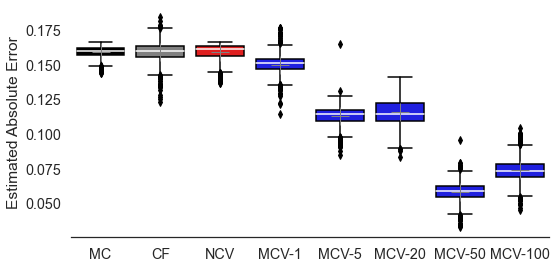

In [30]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
sns.set_style("white")
# Extract Saved Outputs
df_sort = pd.read_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps_SameTRTE_with_CF.pkl")
my_pal = {"MC": "black", "NCV": "red", 'CF':"grey","MCV-1":"blue","MCV-5":"blue", "MCV-20":"blue", "MCV-50":"blue", "MCV-100":"blue"}
g=sns.catplot(x="method",
              y="est_abserr",
              hue="method",
              data=df_sort,
              kind="box",
              height=4,
              aspect=6/3,
              palette=my_pal,
              medianprops={'color':'white'},
              showmeans=True,
              meanprops={"marker": "+",
                         "linestyle": "--",
                         "color": "red",
                         "markeredgecolor": "grey",
                         "markersize": "18"},
              dodge =False
              )


(g.set_axis_labels("", "Estimated Absolute Error")
  .set_titles("{col_name}")
  .despine(left=True)
 )

plt.tight_layout()
plt.show()
# plt.savefig('fb_Sarcos_gammaprior_investinsteps_sameMetaTrainTest.pdf')